## Introduction

for this project I will be analyzing the Air Quality Index (AQI), which is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

**RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** I am going to be constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted. I will do the following:


1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

In [1]:
# Import relevant packages

import numpy as np
import pandas as pd

In [2]:

aqi = pd.read_csv('c4_epa_air_quality.csv')

In [14]:
aqi.head(5)

Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1  Parts per million         0.263158    5  
2  Parts per million         0.111111    2  
3  Parts per million         0.300000    3  
4  Parts per million         0.215789    3

In [12]:
# Explore your DataFrame `aqi`.

aqi.describe()

Unnamed: 0  arithmetic_mean         aqi
count  260.000000       260.000000  260.000000
mean   129.500000         0.403169    6.757692
std     75.199734         0.317902    7.061707
min      0.000000         0.000000    0.000000
25%     64.750000         0.200000    2.000000
50%    129.500000         0.276315    5.000000
75%    194.250000         0.516009    9.000000
max    259.000000         1.921053   50.000000

In [13]:
aqi['state_name'].value_counts()

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

All of the sites collected data on January 1st, 2018. In addition, all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI. 


## Statistical tests

In [17]:
# Summarize the mean AQI for RRE states.

rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi and count for each of the RRE states.

aqi_rre_mean = aqi_rre.groupby(['state_name']).agg({"aqi":"mean", "state_name":"count"})

In [18]:
aqi_rre_mean

aqi  state_name
state_name                         
California    12.121212          66
Florida        5.500000          12
Michigan       8.111111           9
Ohio           3.333333          12
Pennsylvania   2.900000          10
Texas          2.700000          10

In [19]:
# Import seaborn as sns.

import seaborn as sns

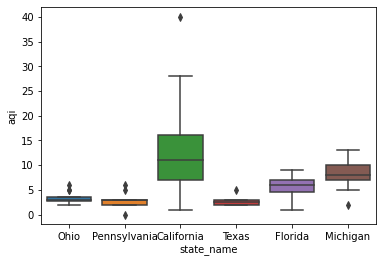

In [22]:
# create a box plot of state name and aqi
sns.boxplot(x=aqi_rre['state_name'], y=aqi_rre['aqi'])

States that will be most affected by this policy are those with an AQI over 10. Based on the data visualization, it can be seen that California and Michigan will be the most affected.  California has the mean and a signficant portion of the boxplot range over 10. Even though the mean for Michigan is below 10, the boxplot ranges above 10 so it will be effected.

In [23]:
#Start to construct confidence interval
# Find the mean aqi for your state.

aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean


12.121212121212121

In [24]:
# Assign a confidence level

confidence_level = 0.95

### Find margin of error (ME)

**margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [32]:
# Calculate your margin of error.

z = 1.96

#calculate standard error.

std_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = z * std_error

print(f"Margin of error: {margin_of_error}")
print(f"Standard error: {std_error}")

Margin of error: 1.7614930896609726
Standard error: 0.8987209641127412


In [36]:
# Calculate confidence interval (upper and lower limits).

upper_limit = sample_mean + margin_of_error
lower_limit = sample_mean - margin_of_error
(lower_limit,upper_limit)

(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. 

In [37]:
# Import stats from scipy.

from scipy import stats

## Evaluation

In [39]:
#confidence_level, sample_mean, std_error need to be provided

stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=std_error)

(10.359751399400034, 13.882672843024208)

In [40]:
#test a 99% confidence interval
stats.norm.interval(alpha=0.99, loc=sample_mean, scale=std_error)

(9.806260326136803, 14.43616391628744)

# Considerations
 
* Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
* Share how varying the confidence level changes the interval. For example, if I varied the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`.  
* Inform that California's observed mean AQI is high and suggest focusing on that state.
* A potential shortcomings of this analysis is the short time period being referenced. 